This notebook uses CGCNN prediction results and generate parity plots to visualize the prediction accuracy. 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [4]:
def plot_scatters(ax, df, data_type, color):
    """
    Helper function that plots scatter points given a dataframe. 
    The scatter points are cgcnn prediction (y-axis) vs. DFT data (x axis).
    It also calculates the mean absolute error (MAE) and 
    root mean squared error (RMSE). 
    """
    return ax.scatter(df['actual_value'], df['predicted_value'], 
                      color=color, marker='o', alpha=0.5, 
                      label='%s: MAE=%0.4f eV/$\AA^2$, RMSE=%0.3f eV/$\AA^2$'\
                      %(data_type, mean_absolute_error(df['actual_value'], 
                                            df['predicted_value']), 
                        np.sqrt(mean_squared_error(df['actual_value'], 
                                                   df['predicted_value']))))

def make_parity_plot(df_training, df_test, test_color, title):
    """
    helper function that plots the parity plot of cgcnn prediction.
    The plot includes scatter points - cgcnn prediction vs. DFT data, 
    legend that includes errors,
    and y=x linear line as a benchmark. 
    """
    f, ax = plt.subplots(figsize=(8,8))
    plot_scatters(ax, df_training, 'train', 'yellowgreen')
    plot_scatters(ax, df_test, 'test', test_color)
    
    ax.plot([min(df_training['actual_value']), 
             max(df_training['actual_value'])-0.03], 
            [min(df_training['actual_value']), 
             max(df_training['actual_value'])-0.03], 
            'k--')

    # format graph
    ax.tick_params(labelsize=20)
    ax.set_xlabel('DFT Energy (eV/$\AA^2$)', fontsize=20)
    ax.set_ylabel('CGCNN predicted Energy (eV/$\AA^2$)', fontsize=20)
    ax.set_xlim(0,0.35)
    ax.set_ylim(0,0.35)
    ax.set_title(title, fontsize=15) 
    ax.legend(fontsize=15, loc='upper left')
    plt.show()

#### Random Split Method Results

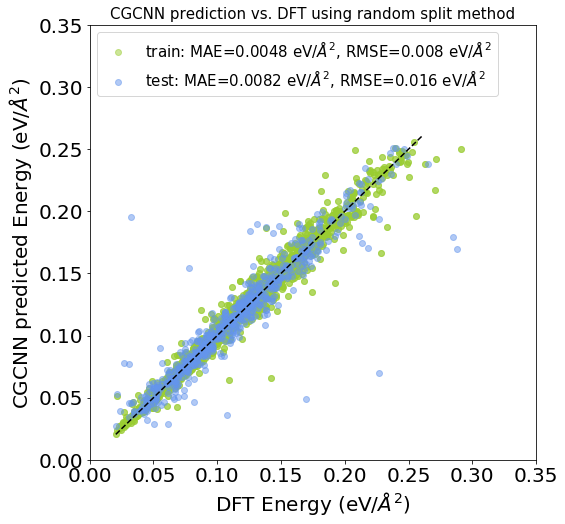

In [5]:
title = 'CGCNN prediction vs. DFT using random split method'
# Load the dataframes that has random spilt results
randomsplit_training_df = pd.read_csv('cgcnn_prediction_results/randomsplit_training.csv', 
                                      sep='\t', index_col=0)
randomsplit_test_df = pd.read_csv('cgcnn_prediction_results/randomsplit_test.csv', 
                                  sep='\t', index_col=0)
#make the plot
make_parity_plot( randomsplit_training_df, randomsplit_test_df, 'cornflowerblue', title)

#### Leave One Out Method (NiGa)

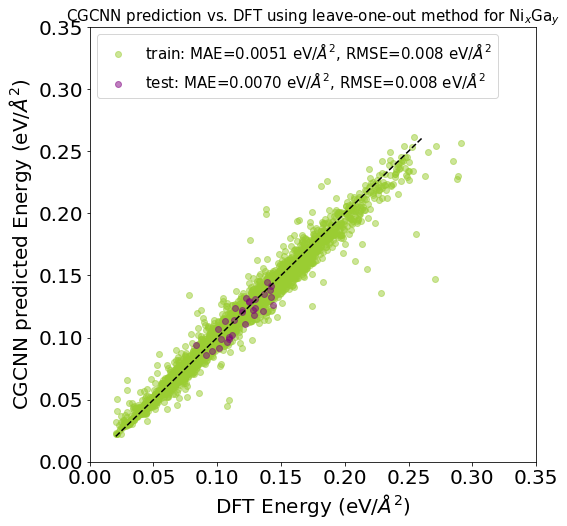

In [6]:
title = 'CGCNN prediction vs. DFT using leave-one-out method for Ni$_x$Ga$_y$'
# Load the dataframes that has random spilt results
NiGa_training_df = pd.read_csv('cgcnn_prediction_results/NiGa_training.csv', 
                            sep='\t', index_col=0)
NiGa_test_df = pd.read_csv('cgcnn_prediction_results/NiGa_test.csv', 
                           sep='\t', index_col=0)
#make the plot
make_parity_plot(NiGa_training_df, NiGa_test_df, 'purple', title)

#### Leave One Out Method (CuAl)

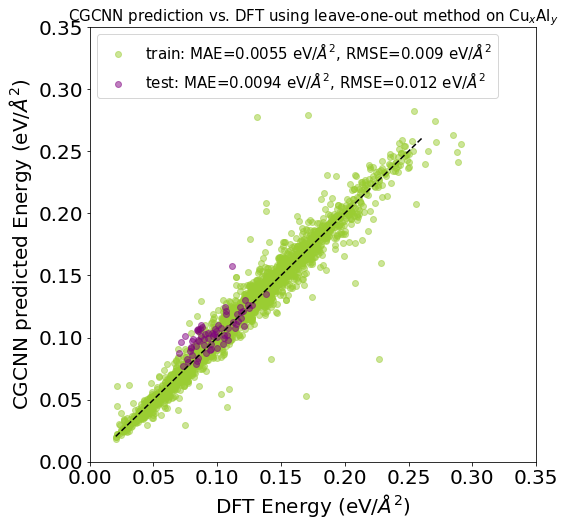

In [7]:
title = 'CGCNN prediction vs. DFT using leave-one-out method on Cu$_x$Al$_y$'
# Load the dataframes that has random spilt results
CuAl_training_df = pd.read_csv('cgcnn_prediction_results/CuAl_training.csv', 
                            sep='\t', index_col=0)
CuAl_test_df = pd.read_csv('cgcnn_prediction_results/CuAl_test.csv', 
                           sep='\t', index_col=0)
#make the plot
make_parity_plot(CuAl_training_df, CuAl_test_df, 'purple', title)